In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler #Choosing StandardScaler over MinMaxScaler as MinMaxScaler scales down values between [0, 1] and dosen't handle outliers well.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Bike Rentals Dataset/day.csv')
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


# Data Descrption


- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Analyzing Target column

Target column = cnt # count of total rental bikes including both casual and registered

Columns casual and registered can be dropped as thier sum is our target variable (cnt)


In [5]:
df.drop(columns=['casual', 'registered'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


### From the above df.info() method:

- Handling missing values => No missing records/values.
- Column 'instant' can be dropped since it contains only index values.
- Column 'dteday' containing date can be dropped since necessary data is already transformed into respective columns yr, mnth, holiday, and weekday columns


In [7]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
# Dropping columns 'instant' and 'dteday'
columns = ['instant', 'dteday']
df = df.drop(columns=columns, axis=1)

### Transforming numerical columns to categorical for analysis

In [9]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [10]:
df['yr'] = df['yr'].map({0: '2018', 1: '2019'})

In [11]:
df['mnth'] = df['mnth'].map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

In [12]:
# Mapping dates to respective weekdays we get
df['weekday'] = df['weekday'].map({5: 'Sun', 6: 'Mon', 0: 'Tue', 1: 'Wed', 2: 'Thu', 3: 'Fri', 4: 'Sat'})

- Create column day_type to indicate if day is 'working', 'weekend' or 'holiday'., merging data of columns holiday and workingday as day_type and dropping them

In [13]:
df['day_type'] = df.apply(lambda x: 'weekend' if x['weekday'] in ['Sun', 'Sat'] and x['holiday'] != 1 else 'holiday' if x['holiday'] == 1 else 'working', axis=1)

In [14]:
df.drop(columns=['holiday', 'workingday'], inplace=True)

In [15]:
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'})

In [16]:
# Printing our dataset after cleaning
df.head(10)

,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,cnt,day_type
0,spring,2018,Jan,Mon,mist,14.110847,18.18125,80.5833,10.749882,985,working
1,spring,2018,Jan,Tue,mist,14.902598,17.68695,69.6087,16.652113,801,working
2,spring,2018,Jan,Wed,clear,8.050924,9.47025,43.7273,16.636703,1349,working
3,spring,2018,Jan,Thu,clear,8.200000,10.60610,59.0435,10.739832,1562,working
4,spring,2018,Jan,Fri,clear,9.305237,11.46350,43.6957,12.522300,1600,working
5,spring,2018,Jan,Sat,clear,8.378268,11.66045,51.8261,6.000868,1606,weekend
6,spring,2018,Jan,Sun,mist,8.057402,10.44195,49.8696,11.304642,1510,weekend
7,spring,2018,Jan,Mon,mist,6.765000,8.11270,53.5833,17.875868,959,working
8,spring,2018,Jan,Tue,clear,5.671653,5.80875,43.4167,24.250650,822,working
9,spring,2018,Jan,Wed,clear,6.184153,7.54440,48.2917,14.958889,1321,working


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   weathersit  730 non-null    object 
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  day_type    730 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 62.9+ KB


# Statistical Analysis
For numerical columns

In [18]:
df.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [19]:
df.corr(numeric_only=True)

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


# Exploratory Data Analysis

### Univariate Analysis

<Axes: xlabel='season', ylabel='count'>

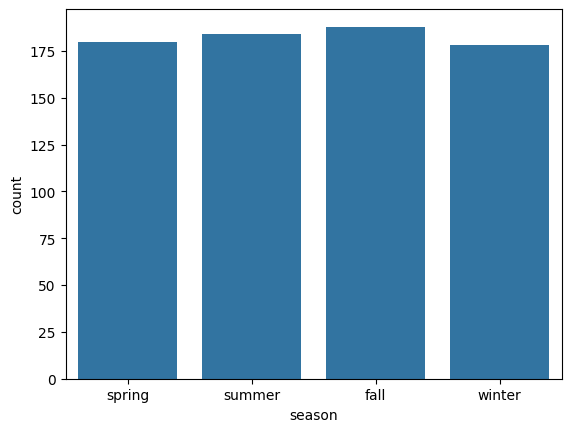

In [20]:
sns.countplot(df, x='season')

<Axes: xlabel='weathersit', ylabel='count'>

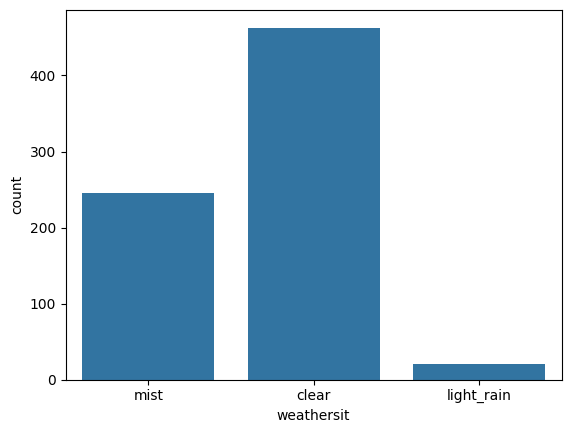

In [21]:
sns.countplot(df, x='weathersit')

### Bivariate Analysis

<Axes: xlabel='season', ylabel='count'>

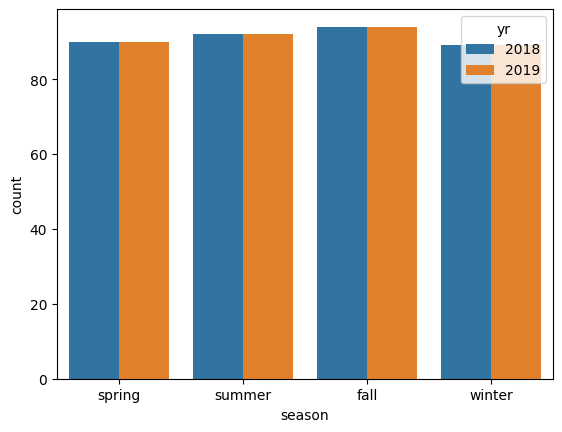

In [22]:
sns.countplot(df, x='season', hue='yr')

<Axes: xlabel='season', ylabel='count'>

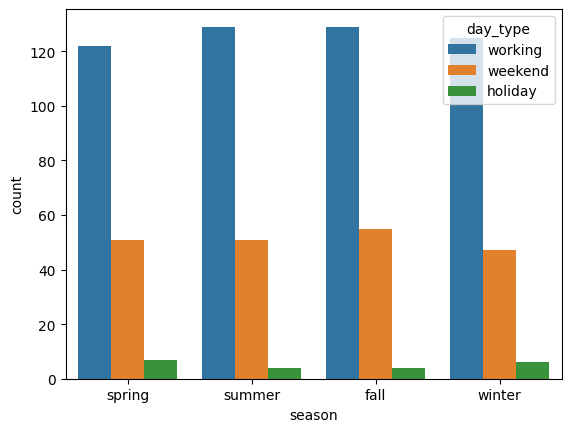

In [23]:
sns.countplot(df, x='season', hue='day_type')

<Axes: xlabel='season', ylabel='cnt'>

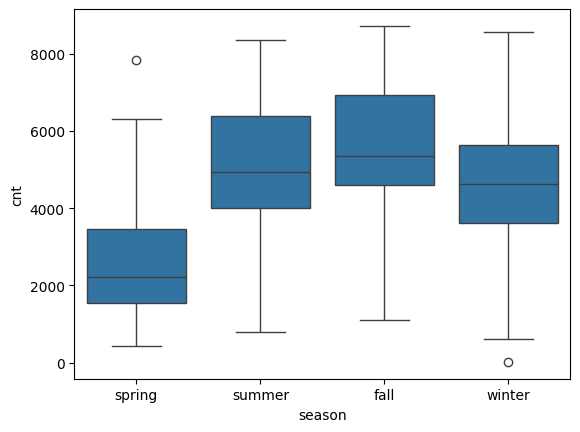

In [24]:
sns.boxplot(df, x='season', y='cnt')

<Axes: xlabel='season', ylabel='temp'>

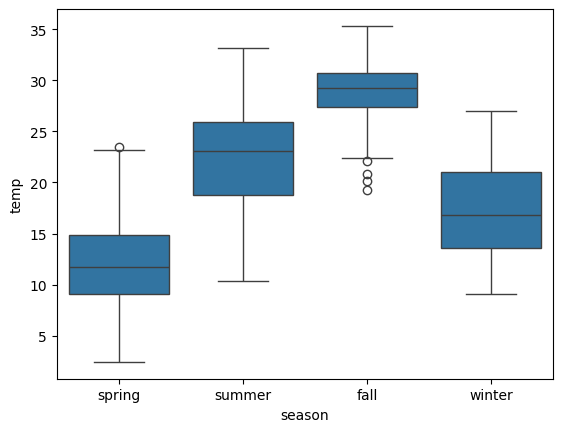

In [25]:
sns.boxplot(df, x='season', y='temp')

### Multivariate Analysis

<Figure size 800x500 with 0 Axes>

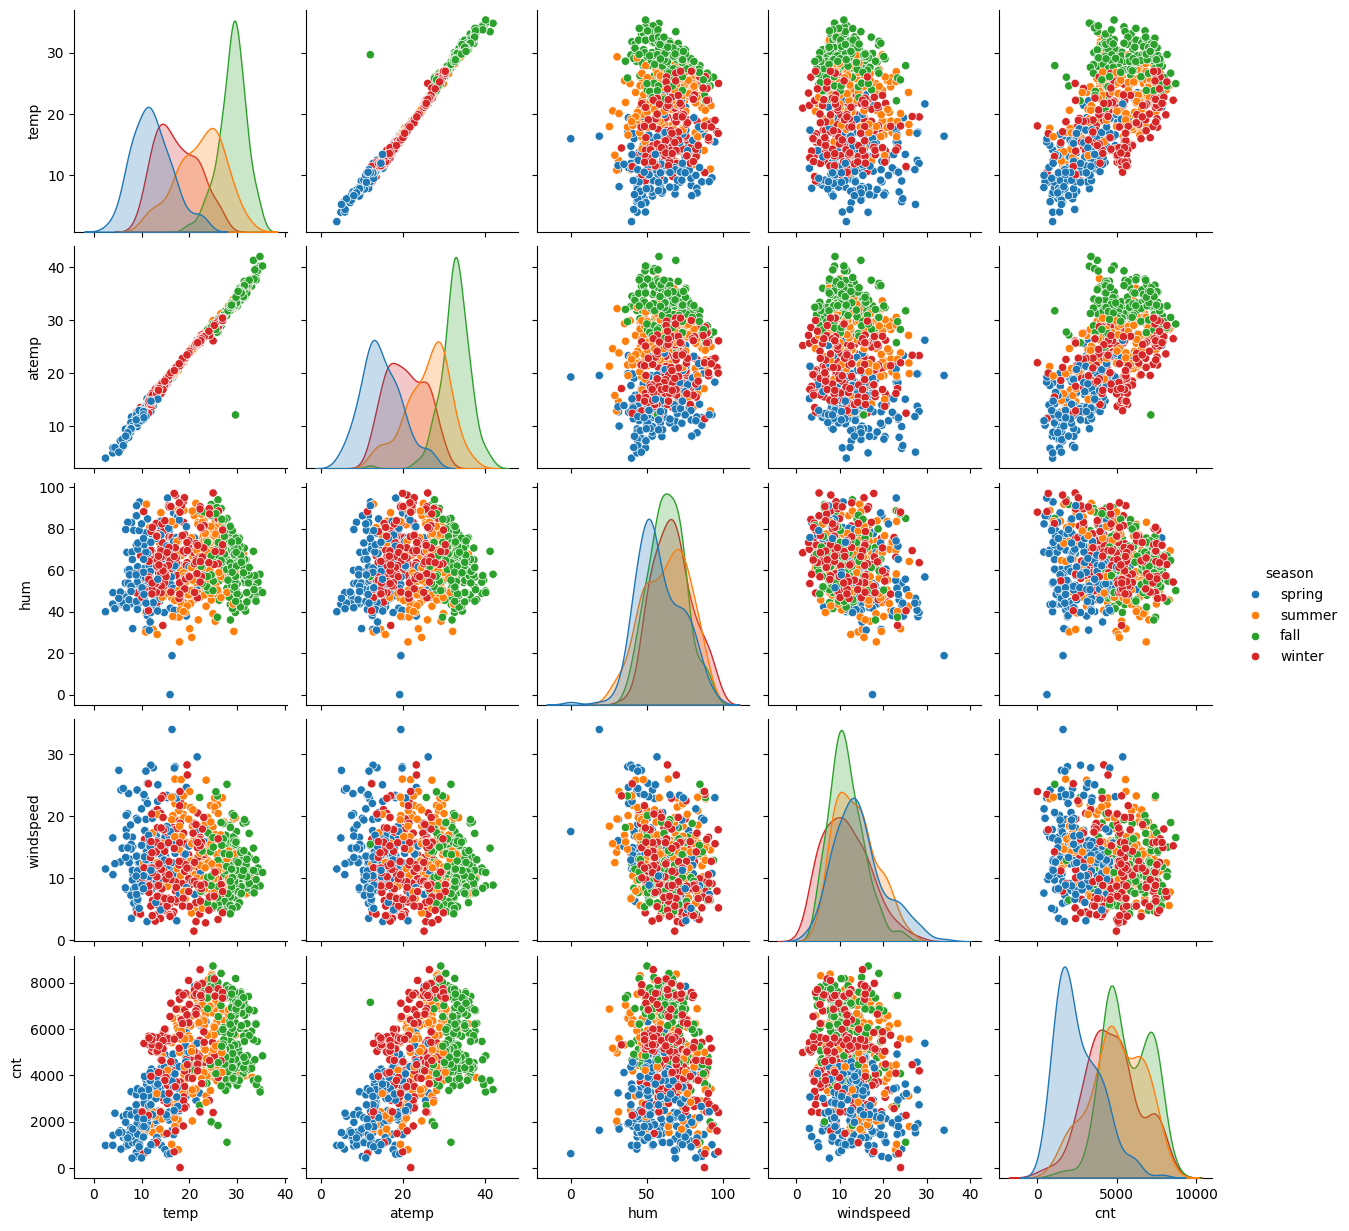

In [26]:
plt.figure(figsize=(8, 5))
sns.pairplot(df, hue='season')
plt.show()

<Figure size 800x500 with 0 Axes>

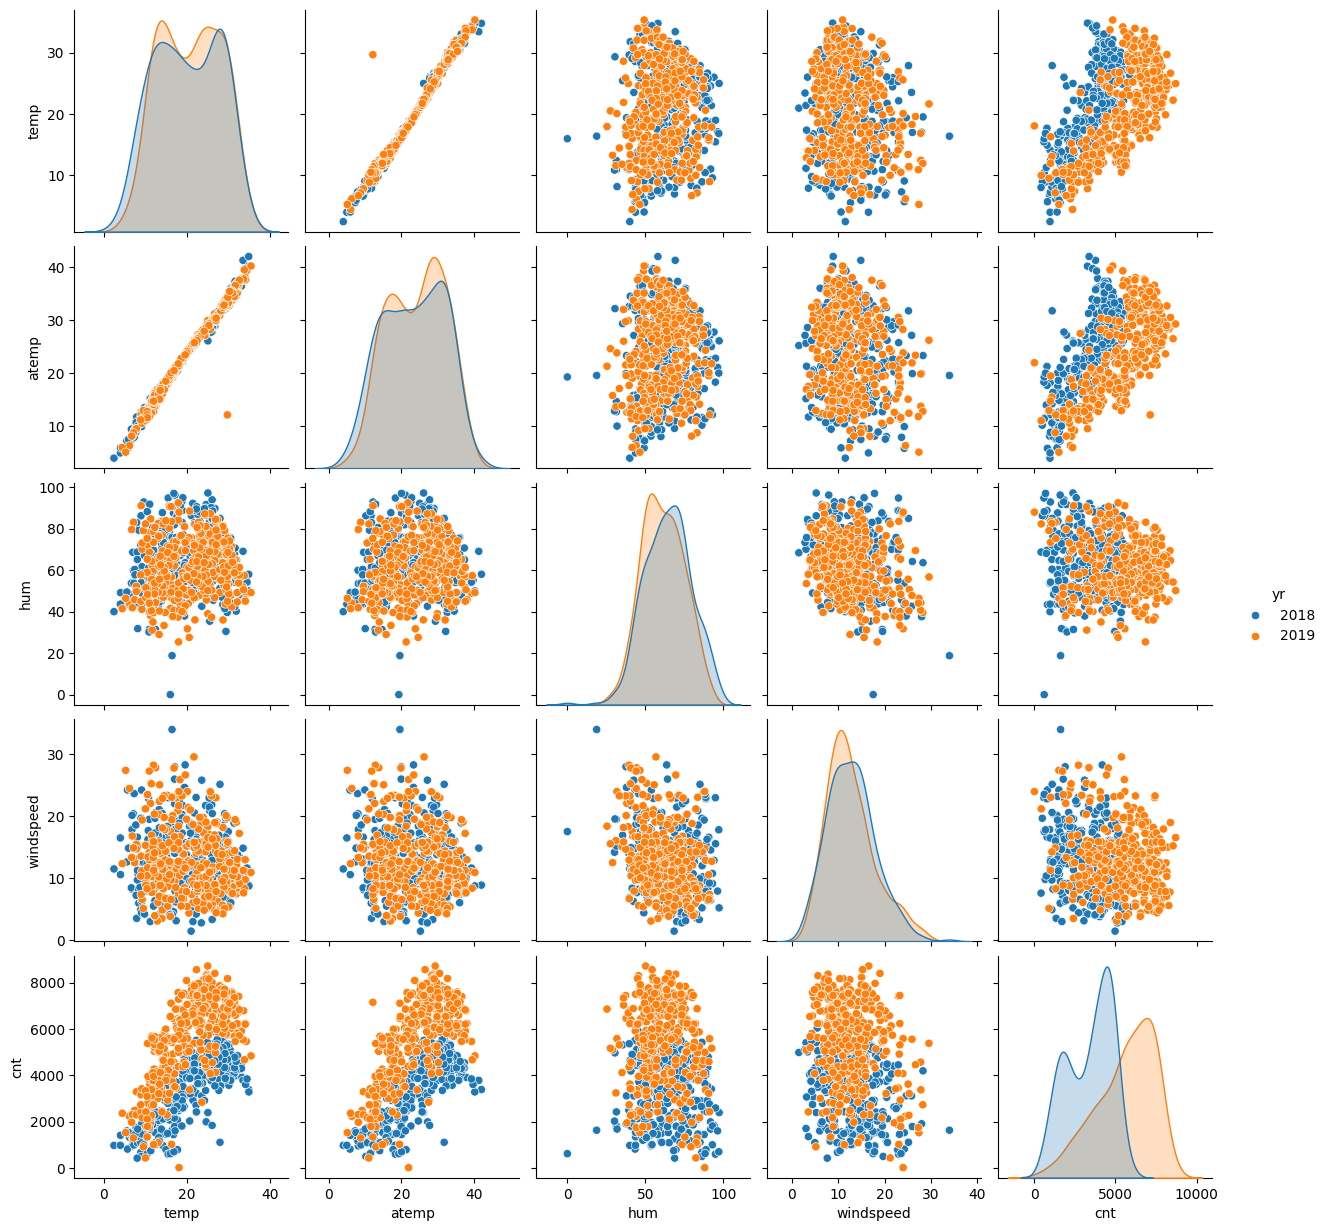

In [27]:
plt.figure(figsize=(8, 5))
sns.pairplot(df, hue='yr')
plt.show()

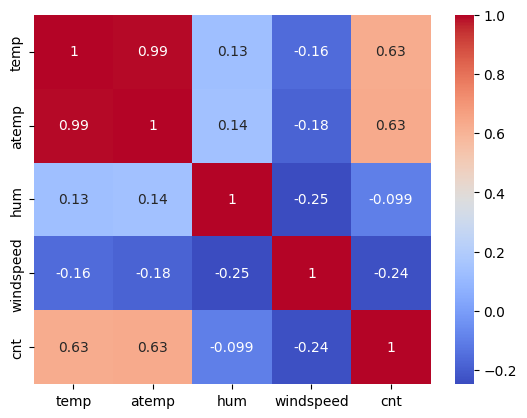

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

From the above plots:
- Comparing temp and atemp columns, since both measure temperature in Celsius, and atemp is slightly more correlated with target (cnt) column, we could use only atemp column and drop temp column.

- Columns hum (humidity) and windspeed can be dropped due to no correlation,

In [29]:
df = df.drop(columns=['temp', 'hum', 'windspeed'], axis=1)

##### Creating dummy variables using pd.get_dummies(df, drop_first=True) method and dropping first column to reduce data(columns) for modeling.

In [30]:
new_df = pd.get_dummies(df, columns=['season', 'yr', 'mnth', 'weekday', 'weathersit', 'day_type'], drop_first=True, dtype=int)

In [31]:
new_df.head()

,atemp,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light_rain,weathersit_mist,day_type_weekend,day_type_working
0,18.18125,985,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
1,17.68695,801,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
2,9.47025,1349,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,10.60610,1562,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,11.46350,1600,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# Simple Linear Regression
- Feature = atemp # since atemp has highest correlation with target variable
- Target = cnt

In [32]:
X = df[['atemp']]
y = df['cnt']

In [33]:
# Splitting dataset into training and testing sets with 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Initializing LinearRegression model
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predicting cnt for test set using our trained model
preds = linear.predict(X_test)

In [36]:
# Calculating mean_squared_error for y and yhat
mean_squared_error(y_test, preds)

2367867.027322015

In [37]:
# Calculating r2_score for y and yhat
r2_score(y_test, preds)

0.3618573172402968

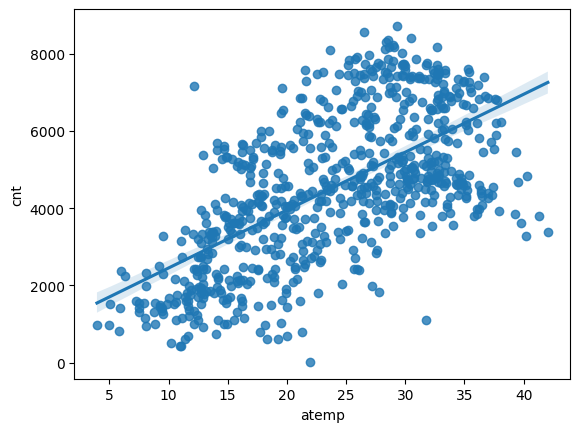

In [38]:
# Plotting how our model fits the data
sns.regplot(data=new_df, x='atemp', y='cnt')
plt.show()

# Multiple Linear Regression
- Target = cnt
- Features = All columns except cnt

In [39]:
X = new_df.drop(columns=['cnt'], axis=1)
y = new_df['cnt']

In [40]:
# Splitting dataset into training and testing sets with 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Initializing LinearRegression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predicting cnt for test set using our trained model
preds = lr.predict(X_test)

In [43]:
# Calculating mean_squared_error for y and yhat
mean_squared_error(y_test, preds)

692586.4635669185

In [44]:
# Calculating mean_squared_error for y and yhat
r2_score(y_test, preds)

0.8133472113070883

# Multiple Linear Regression with Standard scaler

In [45]:
X = new_df.drop(columns=['cnt'], axis=1)
y = new_df['cnt']

In [46]:
# Splitting dataset into training and testing sets with 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Initializing StandardScaler and scaling training and testing sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Initializing LinearRegression model
lrs = LinearRegression()
lrs.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predicting cnt for test set using our trained model
preds = lrs.predict(X_test)

In [50]:
# Calculating mean_squared_error for y and yhat
mean_squared_error(y_test, preds)

692586.4635669194

In [51]:
# Calculating mean_squared_error for y and yhat
r2_score(y_test, preds)

0.8133472113070881

# Conclusion

- After Cleaning the dataset, the features selected for modeling are ['season', 'yr', 'mnth', 'weekday', 'weathersit', 'day_type', 'atemp', 'cnt']
- Dummy values are created for categorical columns and first columns are dropped to reduce data
- Our Multiple Linear Regression model fit data and predicts cnt (target) variable (cnt) with r2_score = 0.8133 (81.33% accuracy)